In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [61]:
# globals
root = "/media/nathan/KINGSTON/Data3DModelling/csv_annotation/"
SLICE_THICKNESS = 20
µm3_to_mm3 = 1e-9

In [3]:
kwargs = dict(sep="\t")
all_csv = [pd.read_csv(root + path, **kwargs) for path in os.listdir(root)]

In [4]:
csv = pd.concat(all_csv)
csv.head()

,Image,Name,Class,Parent,ROI,Centroid X µm,Centroid Y µm,Area µm^2,Perimeter µm,Length µm
0,BB355-LH119.czi,VZ_P,VZ_P,Image,Polygon,10545.4,10553.1,94900.4,1803.5,NaN
1,BB355-LH119.czi,OSVZ_T,OSVZ_T,Image,Polygon,11781.1,5519.4,269667.8,3223.7,NaN
2,BB355-LH119.czi,VZ_T,VZ_T,Image,Polygon,11596.0,5985.7,26397.4,1225.8,NaN
3,BB355-LH119.czi,VZ_O,VZ_O,Image,Polygon,12676.2,9866.6,64286.4,1385.6,NaN
4,BB355-LH119.czi,VZ_O,VZ_O,Image,Polygon,12367.1,7267.7,34022.0,1262.6,NaN


In [5]:
metadata = csv["Image"].str.extract(r'BB(?P<BB>\d+)-[A-Z]*(?P<slice>\d+).')
csv["BB"] = metadata["BB"]
csv["slice"] = metadata["slice"]

In [6]:
csv["Class"] = csv["Class"].replace("OSVZ", "OSVZ_A")
csv["Class"] = csv["Class"].replace("IFL", "IFL_A")
csv["Class"] = csv["Class"].replace("VZ / ISVZ", "VZ_A")
csv["Class"].unique()

array(['VZ_P', 'OSVZ_T', 'VZ_T', 'VZ_O', nan, 'OSVZ_O', 'VZ_H', 'IFL_T',
       'VZ_F', 'OSVZ_F', 'IFL_P', 'OSVZ_P', 'IFL_F', 'OSVZ_A', 'VZ_A',
       'IFL_A', 'IFL_O'], dtype=object)

In [7]:
metadata = csv["Class"].str.extract(r'(?P<zone>[A-Z]+)_(?P<area>[A-Z]+)')
csv["zone"] = metadata["zone"]
csv["area"] = metadata["area"]

In [8]:
csv

,Image,Name,Class,Parent,ROI,Centroid X µm,Centroid Y µm,Area µm^2,Perimeter µm,Length µm,BB,slice,zone,area
0,BB355-LH119.czi,VZ_P,VZ_P,Image,Polygon,10545.4,10553.1,94900.4,1803.5,NaN,355,119,VZ,P
1,BB355-LH119.czi,OSVZ_T,OSVZ_T,Image,Polygon,11781.1,5519.4,269667.8,3223.7,NaN,355,119,OSVZ,T
2,BB355-LH119.czi,VZ_T,VZ_T,Image,Polygon,11596.0,5985.7,26397.4,1225.8,NaN,355,119,VZ,T
3,BB355-LH119.czi,VZ_O,VZ_O,Image,Polygon,12676.2,9866.6,64286.4,1385.6,NaN,355,119,VZ,O
4,BB355-LH119.czi,VZ_O,VZ_O,Image,Polygon,12367.1,7267.7,34022.0,1262.6,NaN,355,119,VZ,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,BB407-RH241.czi,PathAnnotationObject,NaN,Image,Line,4782.3,3141.6,NaN,NaN,3181.0,407,241,NaN,NaN
12,BB407-RH241.czi,OSVZ_P,OSVZ_P,Image,Polygon,7198.3,3012.4,1244840.5,8918.0,NaN,407,241,OSVZ,P
13,BB407-RH241.czi,PathAnnotationObject,NaN,Image,Line,9081.8,3271.9,NaN,NaN,2831.2,407,241,NaN,NaN
14,BB407-RH241.czi,IFL_O,IFL_O,Image,Polygon,11459.2,4168.3,1298524.9,9270.7,NaN,407,241,IFL,O


## Preprocessing

In [9]:
# splitting BB
csv_ = csv[csv["ROI"] == "Polygon"]
csv_ = csv_.filter(["Image", "Class", "Area µm^2", "BB", "slice", "zone", "area"])
csv_ = csv_.rename({"Area µm^2": "Area"}, axis="columns")
grouped = csv_.groupby(csv_.BB)
bb_groups = {k: v for k, v in list(grouped)}
bb_groups['352']

,Image,Class,Area,BB,slice,zone,area
0,BB352-RH92.czi,OSVZ_A,8524627.4,352,92,OSVZ,A
1,BB352-RH118.czi,IFL_A,2079984.0,352,118,IFL,A
2,BB352-RH118.czi,VZ_P,789953.5,352,118,VZ,P
3,BB352-RH118.czi,IFL_P,1070841.3,352,118,IFL,P
5,BB352-RH118.czi,OSVZ_F,1615913.2,352,118,OSVZ,F
...,...,...,...,...,...,...,...
1,BB352-RH317.czi,OSVZ_A,735418.3,352,317,OSVZ,A
2,BB352-RH317.czi,OSVZ_F,9306367.7,352,317,OSVZ,F
3,BB352-RH317.czi,OSVZ_A,780627.6,352,317,OSVZ,A
4,BB352-RH317.czi,IFL_F,6346783.0,352,317,IFL,F


In [10]:
# splitting slices
slice_groups = {bb: {slice_: data for slice_, data in list(bb_data.groupby(bb_data.slice))}
                for bb, bb_data in bb_groups.items()}
slice_groups["352"]["118"]

,Image,Class,Area,BB,slice,zone,area
1,BB352-RH118.czi,IFL_A,2079984.0,352,118,IFL,A
2,BB352-RH118.czi,VZ_P,789953.5,352,118,VZ,P
3,BB352-RH118.czi,IFL_P,1070841.3,352,118,IFL,P
5,BB352-RH118.czi,OSVZ_F,1615913.2,352,118,OSVZ,F
7,BB352-RH118.czi,OSVZ_A,4343225.9,352,118,OSVZ,A
8,BB352-RH118.czi,VZ_A,507405.7,352,118,VZ,A
9,BB352-RH118.czi,OSVZ_P,1831073.1,352,118,OSVZ,P
10,BB352-RH118.czi,IFL_F,1116577.8,352,118,IFL,F


In [11]:
slice_groups["352"]["176"]

,Image,Class,Area,BB,slice,zone,area
0,BB352-RH176.czi,VZ_O,331742.2,352,176,VZ,O
2,BB352-RH176.czi,OSVZ_O,980987.1,352,176,OSVZ,O
3,BB352-RH176.czi,OSVZ_T,884255.2,352,176,OSVZ,T
4,BB352-RH176.czi,VZ_O,173259.9,352,176,VZ,O
5,BB352-RH176.czi,VZ_A,214506.8,352,176,VZ,A
6,BB352-RH176.czi,IFL_T,664593.0,352,176,IFL,T
7,BB352-RH176.czi,VZ_P,291473.3,352,176,VZ,P
8,BB352-RH176.czi,OSVZ_T,1200798.4,352,176,OSVZ,T
9,BB352-RH176.czi,IFL_T,431757.9,352,176,IFL,T
10,BB352-RH176.czi,IFL_O,479127.3,352,176,IFL,O


In [12]:
# del slice_groups["352"]["231"]
# del slice_groups["352"]["270"]
# del slice_groups["352"]["317"]

In [13]:
# gathering slices
def gather_class(df):
    new_df = pd.DataFrame()
    for cl in df.Class.unique():
        # print(cl)
        tmp_df = df[df.Class == cl]
        # print(tmp_df.shape)
        area = tmp_df["Area"].sum()
        ser = tmp_df.iloc[0].copy()
        ser.loc["Area"] = area
        new_df = new_df.append(ser)
    return new_df

groups = {k: {k2: gather_class(df2) for k2, df2 in df.items()} for k, df in slice_groups.items()}
groups["352"]["176"]

,Area,BB,Class,Image,area,slice,zone
0,505002.1,352,VZ_O,BB352-RH176.czi,O,176,VZ
2,2261223.1,352,OSVZ_O,BB352-RH176.czi,O,176,OSVZ
3,2085053.6,352,OSVZ_T,BB352-RH176.czi,T,176,OSVZ
5,749808.1,352,VZ_A,BB352-RH176.czi,A,176,VZ
6,1096350.9,352,IFL_T,BB352-RH176.czi,T,176,IFL
7,291473.3,352,VZ_P,BB352-RH176.czi,P,176,VZ
10,790257.9,352,IFL_O,BB352-RH176.czi,O,176,IFL
14,662963.8,352,IFL_P,BB352-RH176.czi,P,176,IFL
16,1416294.4,352,IFL_F,BB352-RH176.czi,F,176,IFL
17,1998386.2,352,OSVZ_P,BB352-RH176.czi,P,176,OSVZ


In [62]:
def add_sum(arr, axis):
    return np.append(arr, np.expand_dims(arr.sum(axis=axis), axis=axis), axis=axis)

def add_sums(arr, axes):
    if len(axes) == 0:
        return arr
    return add_sums(add_sum(arr, axes[0]), axes[1:])

def fill_slice(df, ref, zones, areas):
    """
    Here we have a reference
    """
    A = "A"
    array = np.zeros((len(zones), len(areas)))
    for z, zone in enumerate(zones):
        with_A = False
        select_A = df[(df.zone == zone) & (df.area == A)]
        
        if len(select_A) > 0:
            with_A = True
            # find which areas are missing
            df_zone = df[(df.zone == zone)]
            real_areas = set(df_zone.area.unique()) - {A}
            miss_areas = list(set(areas) - set(real_areas))
            
            if len(miss_areas) == 0:
                print("Warning, A defined for non missing areas")

            ref_areas = [ref[z, areas.index(miss_area)]
                                for miss_area in miss_areas]

            ref_A_area = np.sum(ref_areas)
            A_area = select_A.iloc[0]["Area"]
            
            
        for a, area in enumerate(areas):
            select = df[(df.zone == zone) & (df.area == area)]
            if len(select) == 0:
                if with_A:
                    idx = miss_areas.index(area)
                    array[z, a] = A_area * ref_areas[idx] / ref_A_area
                else:
                    array[z, a] = 0
            else:
                array[z, a] = select.iloc[0]["Area"]
            
    return array

def fill_initial_slice(df, zones, areas):
    """
    Here we have no reference, we must have a value for each (can't be A)
    """
    array = np.zeros((len(zones), len(areas)))
    for z, zone in enumerate(zones):
        for a, area in enumerate(areas):
            select = df[(df.zone == zone) & (df.area == area)]
            if len(select) == 0:
                array[z, a] = 0
            else:
                array[z, a] = select.iloc[0]["Area"]
            
    return array
    

def estimate_surface(dict_df, verbose=False):
    zones = ["VZ", "IFL", "OSVZ"]
    areas = ["F", "P", "T", "O"]
    A = "A"
    
    # pick middle slice
    slices = sorted(list(map(int, dict_df.keys())))
    slices = list(map(str, slices))
    start_index = int(len(slices) / 2)
    
    array = np.zeros((len(zones), len(areas), len(slices)))
    array[:, :, start_index] = fill_initial_slice(dict_df[slices[start_index]], zones, areas)
    
    # back
    for i in range(start_index - 1, -1, -1):
        print(f"Doing {i}") if verbose else None
        array[:, :, i] = fill_slice(dict_df[slices[i]], array[:, :, i + 1], zones, areas)
    
    # forth
    for i in range(start_index, len(slices)):
        print(f"Doing {i}") if verbose else None
        array[:, :, i] = fill_slice(dict_df[slices[i]], array[:, :, i - 1], zones, areas)
    
    return array, slices

def estimate_volume(dict_df):
    array, slices = estimate_surface(dict_df)
    
    array_summed = add_sums(array, [0, 1])
    # foreach slice, calc its width compared to the others
    width = list()
    for i, sli in enumerate(slices):
        width_left = 0 if i == 0 else abs(int(sli) - int(slices[i - 1])) / 2
        width_right = 0 if i == len(slices) - 1 else abs(int(sli) - int(slices[i + 1])) / 2
        width.append(width_left + width_right)
    
    array_vol = array_summed * np.array(width) * SLICE_THICKNESS * µm3_to_mm3
    
    # sum the slice axis
    return array_vol.sum(axis=2)

In [69]:
# same functions but for the case where we do not have any division according to the area

def fill_slice_no_area(df, zones, area="A"):
    """
    Here we must have an A
    """
    array = np.zeros((len(zones), 1))
    for z, zone in enumerate(zones):
            select = df[(df.zone == zone) & (df.area == area)]
            if len(select) == 0:
                array[z, 0] = 0
            else:
                array[z, 0] = select.iloc[0]["Area"]
            
    return array

def estimate_surface_no_area(dict_df):
    zones = ["VZ", "IFL", "OSVZ"]
    A = "A"
    
    # pick middle slice
    slices = sorted(list(map(int, dict_df.keys())))
    slices = list(map(str, slices))
    
    array = np.zeros((len(zones), 1, len(slices)))
    
    for i in range(len(slices)):
        array[:, :, i] = fill_slice_no_area(dict_df[slices[i]], zones)
    
    return array, slices

def estimate_volume_no_area(dict_df):
    array, slices = estimate_surface_no_area(dict_df)
    
    array_summed = add_sums(array, [0])
    # foreach slice, calc its width compared to the others
    width = list()
    for i, sli in enumerate(slices):
        width_left = 0 if i == 0 else abs(int(sli) - int(slices[i - 1])) / 2
        width_right = 0 if i == len(slices) - 1 else abs(int(sli) - int(slices[i + 1])) / 2
        width.append(width_left + width_right)
    
    array_vol = array_summed * np.array(width) * SLICE_THICKNESS * µm3_to_mm3
    
    # sum the slice axis
    return array_vol.sum(axis=2)

def fill_volume_with_areas(array_no_area, array_ref):
    # array[z, a] = A_area * ref_areas[idx] / ref_A_area
    # new_array = np.zeros(array_ref.shape)
    vector_ref = array_ref[-1, :]
    val_ref = vector_ref[-1]
    new_array = array_no_area * vector_ref / val_ref
    return new_array

In [76]:
arr = estimate_volume_no_area(groups["358"])
ref = estimate_volume(groups["360"])
arr49 = fill_volume_with_areas(arr, ref)
arr_later = [estimate_volume(groups["360"]) for x in ["360", "355", "407", "352"]]
arr_all_ages = [arr49] + arr_later
ages = [49, 63, 70, 78, 94]

In [37]:
res, slices = estimate_surface(groups["352"])
print(slices)

['92', '118', '133', '145', '176', '221', '231', '242', '270', '291', '305', '317']


In [85]:
# 
def plot_slices(res, slices):
    plt.figure(figsize=(12, 12))
    # index is [zone, area, slice]
    color = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (0.5, 0.5, 0.5)]
    titles = ["Frontal", "Parietal", "Temporal", "Occipital", "All"]
    zones = ["VZ", "IFL", "OSVZ", "ALL"]
    int_slices = list(map(int, slices))
    fullres = add_sums(res, [0, 1])
    for i in range(4 + 1): # area
        plt.subplot(3, 2, 1 + i)
        plt.title(titles[i])
        for j in range(3 + 1): # zone
            plt.plot(int_slices, fullres[j, i, :], color=color[j])
        plt.legend(zones)
            
    # plot sums with different areas
    plt.subplot(3, 2, 6)
    plt.title("Areas")
    for k in range(4 + 1):
        plt.plot(int_slices, fullres[3, k, :])
    plt.legend(titles)
            
# plot_age(res, slices)

def plot_ages(list_array, ages):
    list_array = np.array(list_array)
    plt.figure(figsize=(12, 12))
    # index is [age, zone, area]
    color = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (0.5, 0.5, 0.5)]
    titles = ["Frontal", "Parietal", "Temporal", "Occipital", "All"]
    zones = ["VZ", "IFL", "OSVZ", "ALL"]
    int_ages = list(map(int, ages))
    for i in range(4 + 1): # area
        plt.subplot(3, 2, 1 + i)
        plt.title(titles[i])
        for j in range(3 + 1): # zone
            plt.plot(int_ages, list_array[:, j, i], color=color[j])
        plt.legend(zones)
            
    # plot sums with different areas
    plt.subplot(3, 2, 6)
    plt.title("Areas")
    for k in range(4 + 1):
        plt.plot(int_ages, list_array[:, 3, k])
    plt.legend(titles)

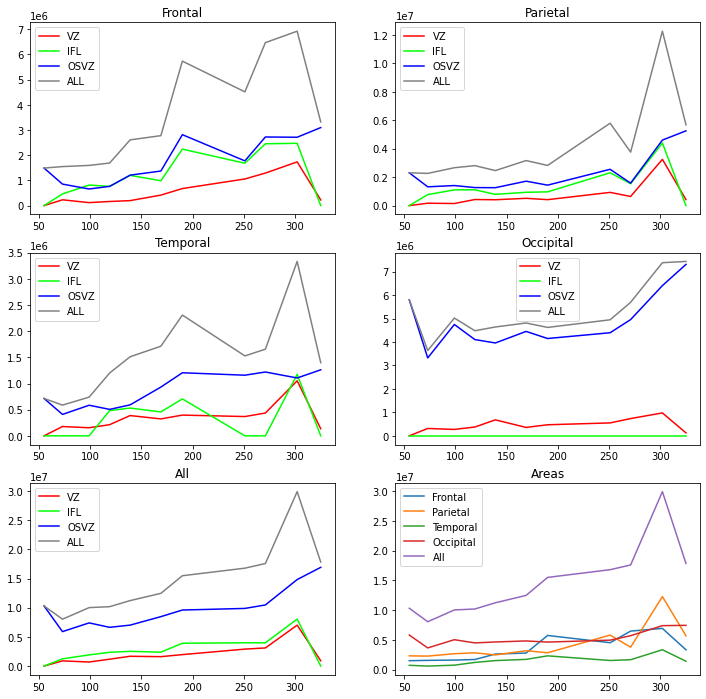

In [81]:
plot_slices(*estimate_surface(groups["355"]))

In [87]:
arr = estimate_volume_no_area(groups["358"])
ref = estimate_volume(groups["360"])
arr49 = fill_volume_with_areas(arr, ref)
arr_later = [estimate_volume(groups[x]) for x in ["360", "355", "407", "352"]]
arr_all_ages = [arr49] + arr_later
ages = [49, 63, 70, 78, 94]

Warning, A defined for non missing areas
Warning, A defined for non missing areas


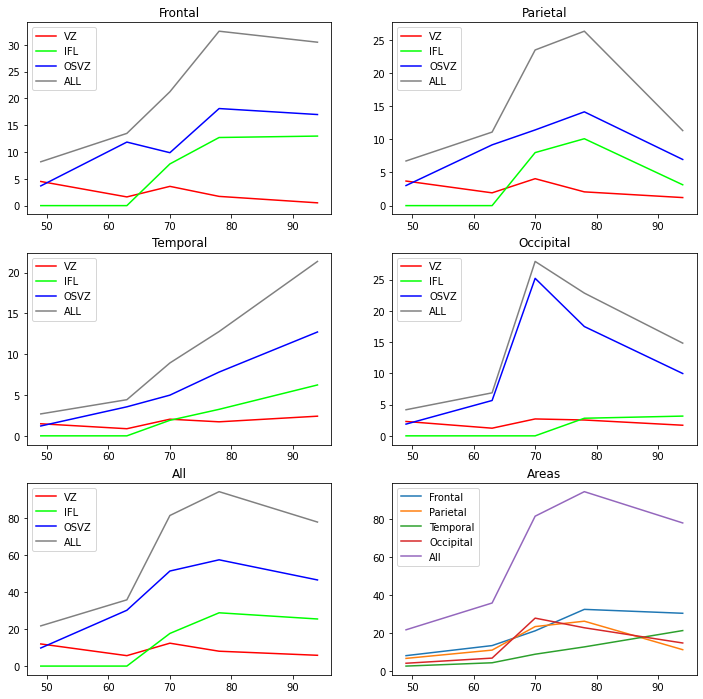

In [88]:
plot_ages(arr_all_ages, ages)